---
Projeto 05 - K-Means - Flags
---

## Etapa 1: Importação das Bibliotecas

In [93]:
#region Bibliotecas
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances, davies_bouldin_score, calinski_harabasz_score

from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")
#endregion

In [94]:
def Stop():
    raise SystemExit("A célula foi interrompida para evitar a execução do código abaixo.")

## Etapa 2: Importação do Dataset

In [95]:
#region Importação do Dataset

# zone -> Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW

fileFlags = "dataset/flags_tratado.csv"

if os.path.exists(fileFlags):
    flags = pd.read_csv(fileFlags)
else:
    link = "https://drive.google.com/file/d/1EeXyC6f619ju4j7Zd7maGY7uZkviIvG1/view?usp=sharing"
    fileID = link.split("/d/")[1].split("/")[0]
    fileFlags = "https://drive.google.com/uc?id=" + fileID
    flags = pd.read_csv(fileFlags)
#endregion

## Etapa 3: Manipulação do Dataset

### Continentes

* 1 = N.America
* 2 = S.America
* 3 = Europe
* 4 = Africa
* 5 = Asia
* 6 = Oceania

In [96]:
#region Mapeamentos para os rótulos de continentes
def mapContinents(data, setMapping):
    data["landmass"] = data["landmass"].replace(setMapping)
    return data

#endregion

In [97]:
landmassMap = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 1}

# flags = mapContinents(flags, landmassMap)

In [98]:
#region Mapeamentos para os rótulos de continentes
continents = flags["landmass"].value_counts().count()

if continents == 2:
    landmassMapping = {
        1: "Intercontinental",
        2: "Outros"
    }
else:
    landmassMapping = {
        1: "N.America",
        2: "S.America",
        3: "Europe",
        4: "Africa",
        5: "Asia",
        6: "Oceania"
    }
#endregion

In [99]:
print(flags["landmass"].value_counts())

landmass
4    52
5    33
1    30
3    27
6    20
2    17
Name: count, dtype: int64


### Religiões

* 0 = Catholic
* 1 = Other Christian
* 2 = Muslim
* 3 = Buddhist
* 4 = Hindu
* 5 = Ethnic
* 6 = Others

In [100]:
config = 0

In [101]:
#region Mapeamentos para os rótulos de religiões
if config == 0:
    religionMapping = {
        0: "Catholic",
        1: "Other Christian",
        2: "Muslim",
        3: "Buddhist",
        4: "Hindu",
        5: "Ethnic",
        6: "Others"
    }
elif config == 1:
    # Cristã e Outras (94, 85)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace([2, 3, 4, 5, 6], 1)

    religionMapping = {
        0: "Católicos",
        1: "Outras"
    }
elif config == 2:
    # Monoteístas, Politeístas e Outras (136, 31, 12)
    flags["religion"] = flags["religion"].replace([0, 1, 2], 0)
    flags["religion"] = flags["religion"].replace([4, 5], 1)
    flags["religion"] = flags["religion"].replace([3, 6], 2)

    religionMapping = {
        0: "Monoteístas",
        1: "Politeístas",
        2: "Outras"
    }
elif config == 3:
    # Ocidental, Oriental e Outras (100, 48, 31)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace([2, 3, 4], 1)
    flags["religion"] = flags["religion"].replace([5, 6], 2)

    religionMapping = {
        0: "Ocidental",
        1: "Oriental",
        2: "Outras"
    }
elif config == 4:
    # Cristã, Islâmica, Oriental e Outras (98, 35, 30, 11)
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace(2, 1)
    flags["religion"] = flags["religion"].replace([3, 4], 2)
    flags["religion"] = flags["religion"].replace([5, 6], 3)

    religionMapping = {
        0: "Cristã",
        1: "Islâmica",
        2: "Oriental",
        3: "Outras"
    }
elif config == 5:
    # Cristã, Muçulmana, Étnicas e Outras
    flags["religion"] = flags["religion"].replace(1, 0)
    flags["religion"] = flags["religion"].replace(2, 1)
    flags["religion"] = flags["religion"].replace(5, 2)
    flags["religion"] = flags["religion"].replace([3, 4, 6], 3)

    religionMapping = {
        0: "Cristã",
        1: "Muçulmana",
        2: "Étnicas",
        3: "Outras"
    }
elif config == 6:
    # Cristã, Muçulmana e Étnicas
    flags = flags[
        (flags["religion"] == 0) | (flags["religion"] == 1) | (flags["religion"] == 2) | (flags["religion"] == 5)]
    flags["religion"] = flags["religion"].replace([0, 1], 0)
    flags["religion"] = flags["religion"].replace(2, 1)
    flags["religion"] = flags["religion"].replace(5, 2)

    religionMapping = {
        0: "Cristã",
        1: "Muçulmana",
        2: "Étnicas"
    }
elif config == 7:
    # Muçulmana, Étnicas e Outras
    flags = flags[(flags["religion"] != 0) & (flags["religion"] != 1)]
    flags["religion"] = flags["religion"].replace(2, 0)
    flags["religion"] = flags["religion"].replace(5, 1)
    flags["religion"] = flags["religion"].replace([3, 4, 6], 2)

    religionMapping = {
        0: "Muçulmana",
        1: "Étnicas",
        2: "Outras"
    }
elif config == 8:
    # Muçulmano e Outras
    flags = flags[(flags["religion"] != 0) & (flags["religion"] != 1)]
    flags["religion"] = flags["religion"].replace(2, 0)
    flags["religion"] = flags["religion"].replace([3, 4, 5, 6], 1)

    religionMapping = {
        0: "Muçulmana",
        1: "Outras"
    }
else:
    # Muçulmana e Étnicas
    flags = flags[(flags["religion"] == 2) | (flags["religion"] == 5)]
    flags["religion"] = flags["religion"].replace(2, 0)
    flags["religion"] = flags["religion"].replace(5, 1)

    religionMapping = {
        0: "Muçulmana",
        1: "Étnicas"
    }
#endregion

In [102]:
print(flags["religion"].value_counts())

religion
1    60
0    40
2    36
5    27
3     8
4     4
6     4
Name: count, dtype: int64


### Linguagens

* 1: "English",
* 2: "Spanish",
* 3: "French",
* 4: "German",
* 5: "Slavic",
* 6: "Other Indo-European",
* 7: "Chinese",
* 8: "Arabic",
* 9: "Japanese/Turkish/Finnish/Magyar",
* 10: "Others"

In [104]:
languageMapping = {
    1: "English",
    2: "Spanish",
    3: "French",
    4: "Other Indo-European",
    5: "Arabic",
    6: "Others"
}

In [105]:
#region Mapeamentos para os rótulos de linguagens
flags["language"] = flags["language"].replace([7, 9], 10)

flags["language"] = flags["language"].replace([4, 5], 6)

languagesMap = {6: 4, 8: 5, 10: 6}

flags["language"] = flags["language"].replace(languagesMap)
#endregion

In [106]:
print(flags["language"].value_counts())

language
6    48
1    43
4    32
2    20
5    19
3    17
Name: count, dtype: int64


## Etapa 4: Preparação dos Dados

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [108]:
features = ["landmass", "language", "area", "population", "zone"]

flagsFeatures = flags[features]
# flagsFeatures = flags.drop(columns=["name", "religion"])

flagsDataFeatures = scaler.fit_transform(flagsFeatures.values)

flagsFeatures = pd.DataFrame(flagsDataFeatures, columns=features)
# flagsFeatures = pd.DataFrame(flagsDataFeatures, columns=flagsFeatures.columns)

## Etapa 5: K-Means

### K-Means: Funções Auxiliares

In [109]:
#region K-Means: Obter uma lista com o WCSS e o número de clusters
def kmeansModel(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return wcss

#endregion

In [110]:
#region K-Means: Aplica o algoritmo KMeans e atribui os clusters
def assignKmeansClusters(data, clusters):
    kmeans = KMeans(n_clusters=clusters, random_state=42)

    rotulosFeatures = kmeans.fit_predict(data)

    data["cluster"] = rotulosFeatures

    return data, kmeans

#endregion

In [111]:
#region K-Means: Variáveis mais Influentes
def topInfluentialVariables(data):
    clusterMeans = data.groupby("cluster").mean()

    topInfluences = clusterMeans.T

    return topInfluences

#endregion

In [112]:
#region K-Means: Análise de Religiões por Continente
def analyzeReligionByContinent(data, continent="landmass", religion="religion"):
    religionContinentCounts = data.groupby([continent, religion]).size().unstack(fill_value=0)
    print(">>> Frequência de Religiões por Continente:")
    print(religionContinentCounts, end="\n\n")

    dominantReligionByContinent = religionContinentCounts.idxmax(axis=1)
    print(">>> Religião Predominante por Continente:")
    print(dominantReligionByContinent, end="\n\n")

    diversityByContinent = (religionContinentCounts > 0).sum(axis=1)
    print(">>> Número de Religiões Presentes por Continente:")
    print(diversityByContinent, end="\n\n")

    rareReligions = (religionContinentCounts > 0).sum(axis=0)
    print(">>> Número de Continentes onde cada Religião está Presente:")
    print(rareReligions)

#endregion

In [113]:
#region K-Means: Plotar Elbow Method
def plotElbowMethod(wcss):
    fig = go.Figure()

    # Adicionar a linha do WCSS
    fig.add_trace(go.Scatter(
        x=list(range(1, 11)),
        y=wcss,
        mode="lines+markers",
        marker=dict(size=12, color="blue"),
        line=dict(color="blue", width=2),
        name="WCSS"
    ))

    # Personalização do layout
    fig.update_layout(
        title=dict(
            text="Elbow Method",
            x=0.5,
            xanchor="center",
            yanchor="top"
        ),
        xaxis=dict(
            title="Number of Clusters",
            tickmode="linear",
            tick0=1,
            dtick=1
        ),
        yaxis=dict(
            title="WCSS"
        ),
        template="plotly_white",
        width=900,
        height=500
    )

    fig.show()

#endregion

In [114]:
#region K-Means: Plotar Clusters com Centróides
def plotClustersWithCentroids(data, kmeans):
    # Aplicar PCA para reduzir os dados a 2 dimensões
    pca = PCA(n_components=2)
    flagsFeaturesPCA = pca.fit_transform(data.drop(columns=["cluster"]))

    # Reduzir os centróides para 2 dimensões
    centroidsPCA = pca.transform(kmeans.cluster_centers_)

    # Criar o gráfico de dispersão dos clusters
    grafico = px.scatter(
        x=flagsFeaturesPCA[:, 0],
        y=flagsFeaturesPCA[:, 1],
        color=data["cluster"].astype(str),
        size=[10] * data.shape[0],
        labels={"x": "X", "y": "Y", "color": "Cluster"},
        template="plotly_dark"
    )

    # Adicionar os centróides ao gráfico
    for i, centroid in enumerate(centroidsPCA):
        grafico.add_scatter(
            x=[centroid[0]],
            y=[centroid[1]],
            mode="markers+text",
            marker=dict(size=15, color="white", symbol="x"),
            text=[f"C-{i}"],
            textposition="top center",
            name=f"Centroid {i}",
            showlegend=True
        )

    # Centralizar o título e ajustar o layout
    grafico.update_layout(
        title={
            "text": "Visualização dos Clusters com seus Centróides",
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top"
        },
        width=900,
        height=500
    )

    grafico.show()

#endregion

In [115]:
#region K-Means: Calcular a Média de cada variável por Cluster (Silhouette)

# O coeficiente de silhueta é uma métrica usada para avaliar a qualidade do agrupamento.
# Ele varia de -1 a 1, onde:
# -> Valores próximos de 1 indicam que o ponto está bem agrupado.
# -> Valores próximos de -1 indicam que o ponto pode estar mal atribuído.
# -> Valores próximos de 0 indicam sobreposição entre clusters.

def calculateSilhouette(data, labels):
    # Calcular os coeficientes de silhueta
    silhouetteVals = silhouette_samples(data, labels)

    # Criar um DataFrame para exibir a silhueta e os rótulos dos clusters
    silhouetteDf = pd.DataFrame({
        "Silhouette": silhouetteVals,
        "Cluster": labels
    })

    # Média da silhueta para todos os pontos
    meanSilhouette = silhouette_score(data, labels)

    # Média da silhueta por cluster
    meanSilhouetteByCluster = silhouetteDf.groupby("Cluster")["Silhouette"].mean()

    print(f"Coeficiente médio de silhueta (Geral): {round(meanSilhouette, 3)}", end="\n\n")
    print("Coeficiente médio de silhueta por cluster:")
    print(meanSilhouetteByCluster.round(3))

#endregion


In [116]:
#region K-Means: Calcula a distância intra e inter classe
def calculateDistanceIntraAndInterClasse(data):
    # Distâncias entre todos os pontos
    distanceMatrix = pairwise_distances(data)

    intra = []
    inter = []

    # Interage sobre cada ponto no dataset
    for i in range(len(data)):
        sameCluster = labels == labels[i]
        otherClusters = ~sameCluster

        # Calcular distâncias médias
        intra.append(distanceMatrix[i, sameCluster].mean())
        inter.append(distanceMatrix[i, otherClusters].min())

    # Transformar em arrays para facilitar o cálculo
    intra = np.array(intra)
    inter = np.array(inter)

    # Coeficiente de Silhueta
    coefSilhouette = (inter - intra) / np.maximum(intra, inter)

    # Criar DataFrame para análise
    silhouettes = pd.DataFrame({
        "Intraclasse (a(i))": intra,
        "Interclasse (b(i))": inter,
        "Silhouette": coefSilhouette,
        "Cluster": labels
    })

    return silhouettes

#endregion

In [117]:
#region K-Means: Calcula os índices de Inertia, Davies-Bouldin e Calinski-Harabasz
def calculateClusteringMetrics(data, labels):
    """
    > Inertia (WCSS):
    * Valores mais baixos indicam clusters mais compactos. No entanto, o valor em si é relativo e depende do conjunto de dados e do número de clusters. Normalmente, você procura um ponto de "cotovelo" no gráfico de WCSS versus o número de clusters para determinar o ponto ótimo.
    """
    inertia = kmeans.inertia_

    """
    > Davies-Bouldin Index
    * Bom agrupamento: Valores próximos de 0.
    * Agrupamento moderado: Valores entre 0 e 1.
    * Agrupamento ruim: Valores maiores que 1.

    Valores mais baixos indicam melhor agrupamento, pois ele mede a taxa média de similaridade de cada agrupamento com seu agrupamento mais similar.
    """
    daviesBouldin = davies_bouldin_score(data, labels)

    """
    > Calinski-Harabasz Index
    * Bom agrupamento: Valores mais altos.
    * Agrupamento moderado: Valores intermediários.
    * Agrupamento ruim: Valores mais baixos.
    * Valores mais altos indicam agrupamentos mais bem definidos, pois medem a razão da soma da dispersão entre os agrupamentos e da dispersão dentro dos agrupamentos.
    """
    calinskiHarabasz = calinski_harabasz_score(data, labels)

    return {
        "Inertia (WCSS)": round(inertia, 2),
        "Davies-Bouldin Index": round(daviesBouldin, 2),
        "Calinski-Harabasz Index": round(calinskiHarabasz, 2)
    }

#endregion

In [118]:
#region K-Means: Plotar Gráfico de Barras
def plotBarChart(data=None, columns=None, title=None, xlabel=None, ylabel=None, legend=None):
    if legend is not None:
        # Contar o número de elementos em cada cluster
        clusterCounts = data.groupby([columns[0], columns[1]]).size().unstack(fill_value=0)
        # Figura
        ax = clusterCounts.plot(kind="bar", figsize=(12, 6), width=0.8)
        # Legendas
        plt.legend(title=legend, bbox_to_anchor=(1.05, 1), loc="upper left")
        # Adicionar os valores acima das barras
        for container in ax.containers:
            ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12)
    else:
        plt.figure(figsize=(10, 6), dpi=100)
        data.plot(kind="bar", color=sns.color_palette("YlGnBu", len(data)), alpha=0.8)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

#endregion

In [119]:
#region K-Means: Função para obter a população/área por cluster
def resultsByCluster(data, cols, cluster):
    data = data[data["cluster"] == cluster][cols]

    return data

#endregion

### K-Means: Features

#### Elbow Method

In [120]:
wcss = kmeansModel(flagsDataFeatures)

plotElbowMethod(wcss)
print(wcss)

[83.15404625717004, 33.21182464366831, 30.37285046904846, 23.459517715595116, 17.923162379556558, 12.776797103590475, 11.159020363141751, 10.455419396195389, 9.453358820820743, 8.176215835190439]


In [121]:
flagsFeaturesWithClusters, kmeans = assignKmeansClusters(flagsFeatures, 2)

plotClustersWithCentroids(flagsFeaturesWithClusters, kmeans)


     landmass  language      area  population      zone  cluster
0         0.8       1.0  0.064956    0.023392  0.000000        1
1         0.6       0.8  0.239374    0.029240  0.000000        1
2         1.0       0.0  0.000000    0.000000  0.666667        0
3         0.4       0.6  0.000000    0.000000  0.000000        1
4         0.6       1.0  0.125000    0.010234  0.333333        1
..        ...       ...       ...         ...       ...      ...
174       0.2       0.2  0.091419    0.021930  1.000000        0
175       1.0       0.0  0.000301    0.000000  0.666667        0
176       0.6       1.0  0.090718    0.040936  0.333333        1
177       0.6       1.0  0.075481    0.008772  0.333333        1
178       0.6       1.0  0.039194    0.011696  0.333333        1

[179 rows x 6 columns]
     landmass  language      area  population      zone  cluster
0         0.8       1.0  0.064956    0.023392  0.000000        1
1         0.6       0.8  0.239374    0.029240  0.000000        1
2

#### Métricas

In [122]:
# Cálculo da Silhueta
data = flagsFeaturesWithClusters.drop(columns=["cluster"])
labels = kmeans.labels_

calculateSilhouette(data, labels)

Coeficiente médio de silhueta (Geral): 0.547

Coeficiente médio de silhueta por cluster:
Cluster
0    0.511
1    0.572
Name: Silhouette, dtype: float64


In [123]:
# K-Means: Calcula os índices de Inertia, Davies-Bouldin e Calinski-Harabasz
metrics = calculateClusteringMetrics(data, labels)

print(metrics)

{'Inertia (WCSS)': 33.21, 'Davies-Bouldin Index': 0.73, 'Calinski-Harabasz Index': 266.16}


**Inertia (WCSS):**
* Valores mais baixos indicam clusters mais compactos. No entanto, o valor em si é relativo e depende do conjunto de dados e do número de clusters.
***
**Davies-Bouldin Index**
* Bom agrupamento: Valores próximos de 0.
* Agrupamento moderado: Valores entre 0 e 1.
* Agrupamento ruim: Valores maiores que 1.
***
**Calinski-Harabasz Index**
* Bom agrupamento: Valores mais altos.
* Agrupamento moderado: Valores intermediários.
* Agrupamento ruim: Valores mais baixos.
* Valores mais altos indicam agrupamentos mais bem definidos, pois medem a razão da soma da dispersão entre os agrupamentos e da dispersão dentro dos agrupamentos.

#### Variáveis mais Influentes

In [124]:
topInfluences = topInfluentialVariables(flagsFeaturesWithClusters)

topInfluences

cluster,0,1
landmass,0.267568,0.685714
language,0.200000,0.746667
area,0.067577,0.048032
population,0.016220,0.030395
zone,0.914414,0.092063


**Landmass:**
>* O Cluster 1 indica que ele está mais associado a países de grandes continentes.
***
**Language:**
>* O Cluster 1 inclui países com maior diversidade linguística ou com valores altos relacionados a idiomas dominantes.
***
**Area:**
>* A variável area tem valores médios relativamente baixos em ambos os clusters
***
**Population:**
>* O Cluster 1 tem uma população média maior em comparação ao Cluster 0, indicando que pode incluir países mais populosos.
***
**Zone:**
>* A variável zone está quase totalmente associada ao Cluster 0. Isso pode significar que o Cluster 0 está concentrado em uma zona específica.
 >* Já o Cluster 1 é mais diversificado ou associado a outras zonas.

#### Cluster x Continente

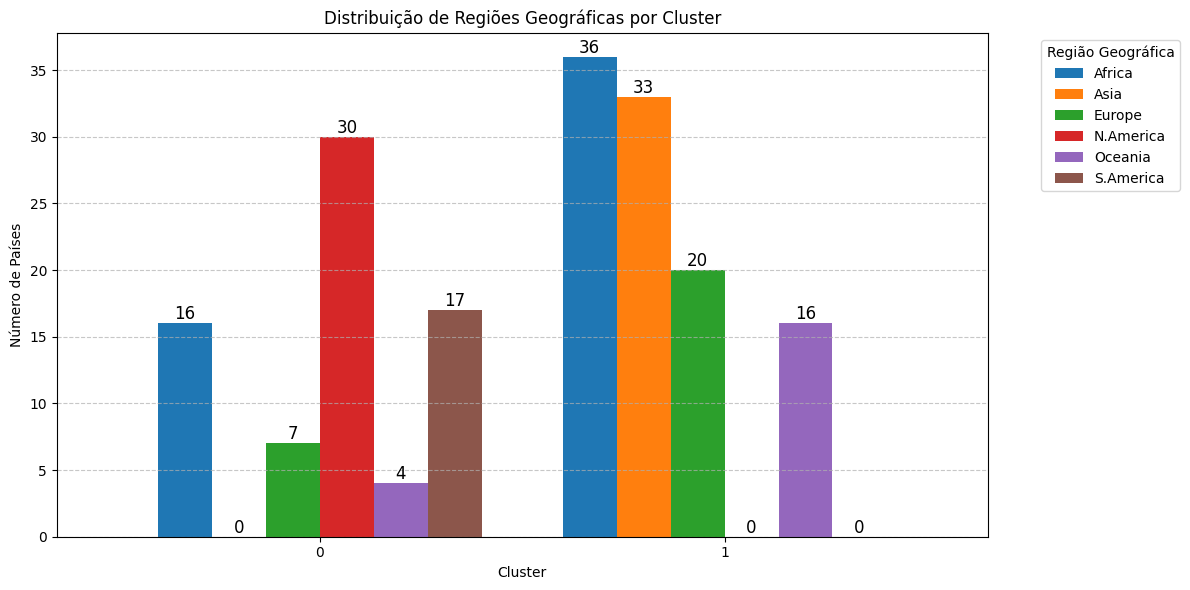

In [127]:
#region Cluster x Continente
flagsLandmass = flagsFeaturesWithClusters.copy()
flagsLandmass["landmass"] = flags["landmass"].map(landmassMapping)

plotBarChart(
    data=flagsLandmass,
    columns=["cluster", "landmass"],
    title="Distribuição de Regiões Geográficas por Cluster",
    xlabel="Cluster",
    ylabel="Número de Países",
    legend="Região Geográfica"
)
#endregion

In [126]:
import pandas as pd

# Copiar os dados com clusters e mapear a região geográfica
flagsLandmass = flagsFeaturesWithClusters.copy()
flagsLandmass["landmass"] = flags["landmass"].map(landmassMapping)

# Contar o número de países por cluster e região geográfica
landmassClusterMatrix = flagsLandmass.groupby(["cluster", "landmass"]).size().unstack(fill_value=0)

# Exibir a matriz resultante
print("Matriz de Distribuição de Países por Cluster e Região Geográfica:")
print(landmassClusterMatrix)


Matriz de Distribuição de Países por Cluster e Região Geográfica:
landmass  Africa  Asia  Europe  N.America  Oceania  S.America
cluster                                                      
0             16     0       7         30        4         17
1             36    33      20          0       16          0


In [128]:
flagsCountry = flagsFeaturesWithClusters.copy()
flagsCountry["name"] = flags["name"]
flagsCountry["language"] = flags["language"].map(languageMapping)

cluster_0 = flagsCountry[flagsCountry["cluster"] == 0]["name"]
cluster_1 = flagsCountry[flagsCountry["cluster"] == 1]["name"]

In [129]:
cluster_0

,name
2,American-Samoa
5,Anguilla
6,Antigua-Barbuda
7,Argentina
8,Argentine
...,...
169,Uruguay
170,US-Virgin-Isles
171,USA
174,Venezuela


In [ ]:
cluster_1

0       Afghanistan
1           Algeria
3           Andorra
4            Angola
9         Australia
           ...     
172         Vanuatu
173    Vatican-City
176           Zaire
177          Zambia
178        Zimbabwe
Name: name, Length: 105, dtype: object

#### Cluster x Linguagens

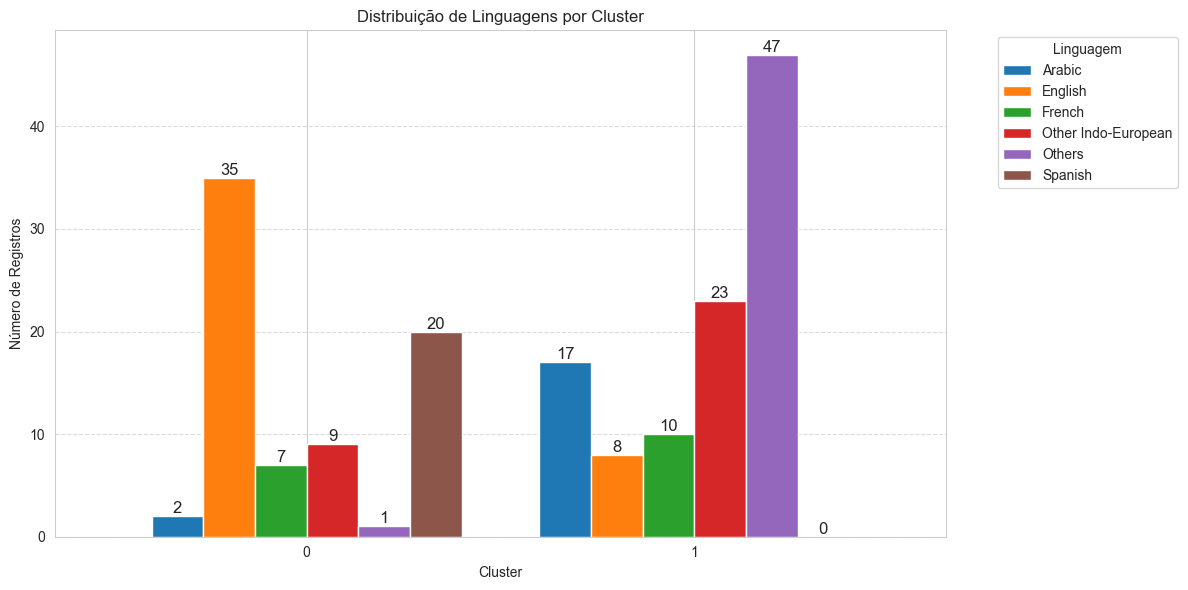

In [ ]:
#region Cluster x Linguagens
flagsLanguages = flagsFeaturesWithClusters.copy()
flagsLanguages["language"] = flags["language"].map(languageMapping)

plotBarChart(
    data=flagsLanguages,
    columns=["cluster", "language"],
    title="Distribuição de Linguagens por Cluster",
    xlabel="Cluster",
    ylabel="Número de Registros",
    legend="Linguagem"
)
#endregion

In [133]:
import pandas as pd

# Copiar os dados com clusters e mapear a região geográfica
flagsLanguages = flagsFeaturesWithClusters.copy()
flagsLanguages["language"] = flags["language"].map(languageMapping)

# Contar o número de países por cluster e região geográfica
landmassClusterMatrix = flagsLanguages.groupby(["cluster", "language"]).size().unstack(fill_value=0)

# Exibir a matriz resultante
print("Matriz de Distribuição de Países por Cluster e Região Geográfica:")
print(landmassClusterMatrix)


Matriz de Distribuição de Países por Cluster e Região Geográfica:
language  Arabic  English  French  Other Indo-European  Others  Spanish
cluster                                                                
0              2       35       7                    9       1       20
1             17        8      10                   23      47        0


In [ ]:
cluster_0 = flagsCountry[flagsCountry["cluster"] == 0][["name", "language"]]
cluster_1 = flagsCountry[flagsCountry["cluster"] == 1][["name", "language"]]

In [ ]:
cluster_0["language"].value_counts()

language
English                35
Spanish                20
Other Indo-European     9
French                  7
Arabic                  2
Others                  1
Name: count, dtype: int64

In [ ]:
cluster_1["language"].value_counts()

language
Others                 47
Other Indo-European    23
Arabic                 17
French                 10
English                 8
Name: count, dtype: int64

#### Cluster x Área

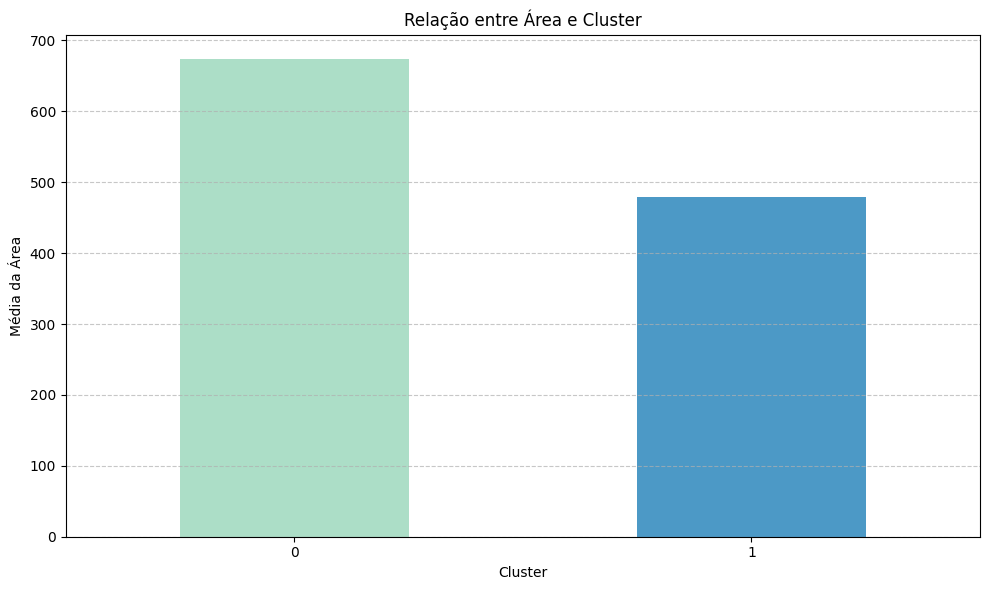

In [135]:
#region Cluster x Área (Média)
flagsArea = flagsFeaturesWithClusters.copy()
flagsArea["country"] = flags["name"]
flagsArea["area"] = flags["area"]

areaByCluster = flagsArea.groupby("cluster")["area"].mean()

plotBarChart(
    data=areaByCluster,
    title="Relação entre Área e Cluster",
    xlabel="Cluster",
    ylabel="Média da Área"
)
#endregion

In [136]:
# Exibir a matriz com as médias de área por cluster
areaByClusterMatrix = areaByCluster.reset_index()  # Para transformar a Series em DataFrame
areaByClusterMatrix.columns = ['Cluster', 'Média da Área']  # Renomear as colunas

# Exibir a matriz
print(areaByClusterMatrix)


   Cluster  Média da Área
0        0     674.148649
1        1     479.171429


In [ ]:
# Informações sobre a área por cluster
resultsByCluster(data=flagsArea, cols=["country", "area"], cluster=0)

,country,area
2,American-Samoa,0
5,Anguilla,0
6,Antigua-Barbuda,0
7,Argentina,2777
8,Argentine,2777
...,...,...
169,Uruguay,178
170,US-Virgin-Isles,0
171,USA,9363
174,Venezuela,912


#### Cluster x População (Clusters: 3)

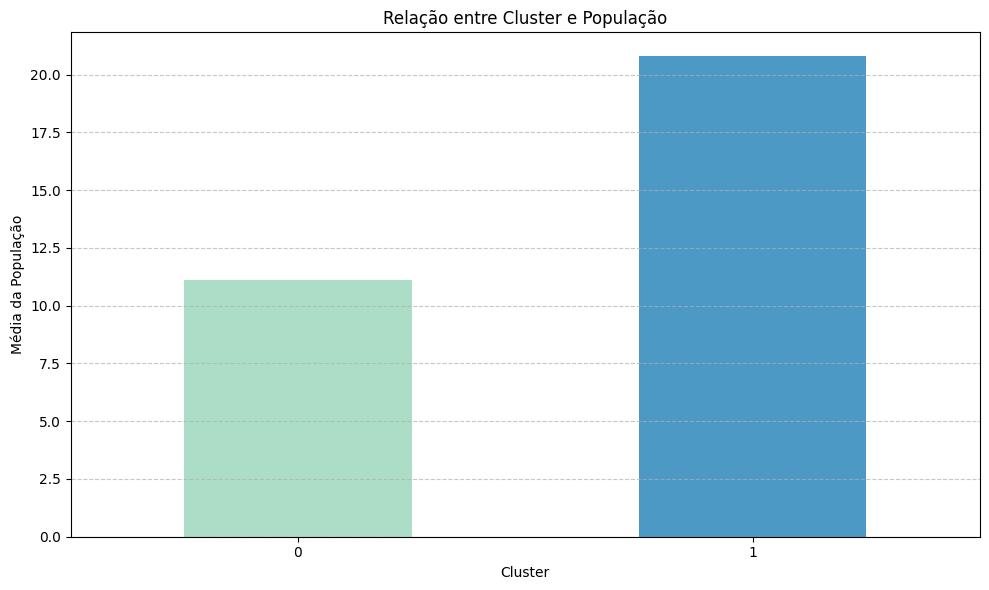

In [137]:
#region Cluster x População (Média)
flagsPopulation = flagsFeaturesWithClusters.copy()
flagsPopulation["country"] = flags["name"]
flagsPopulation["population"] = flags["population"]

areaByCluster = flagsPopulation.groupby("cluster")["population"].mean()

plotBarChart(
    data=areaByCluster,
    title="Relação entre Cluster e População",
    xlabel="Cluster",
    ylabel="Média da População"
)
#endregion

In [138]:
import pandas as pd

# Criando a matriz de distribuição de população por cluster
populationByCluster = flagsPopulation.groupby("cluster")["population"].mean().reset_index()

# Exibindo a matriz
population_matrix = populationByCluster.pivot_table(index="cluster", columns="cluster", values="population")

# Exibindo a matriz
print(population_matrix)


cluster          0          1
cluster                      
0        11.094595        NaN
1              NaN  20.790476


In [ ]:
# Informações sobre a população por cluster
resultsByCluster(data=flagsPopulation, cols=["country", "population"], cluster=1)

,country,population
0,Afghanistan,16
1,Algeria,20
3,Andorra,0
4,Angola,7
9,Australia,15
...,...,...
172,Vanuatu,0
173,Vatican-City,0
176,Zaire,28
177,Zambia,6


#### Cluster x Religiões

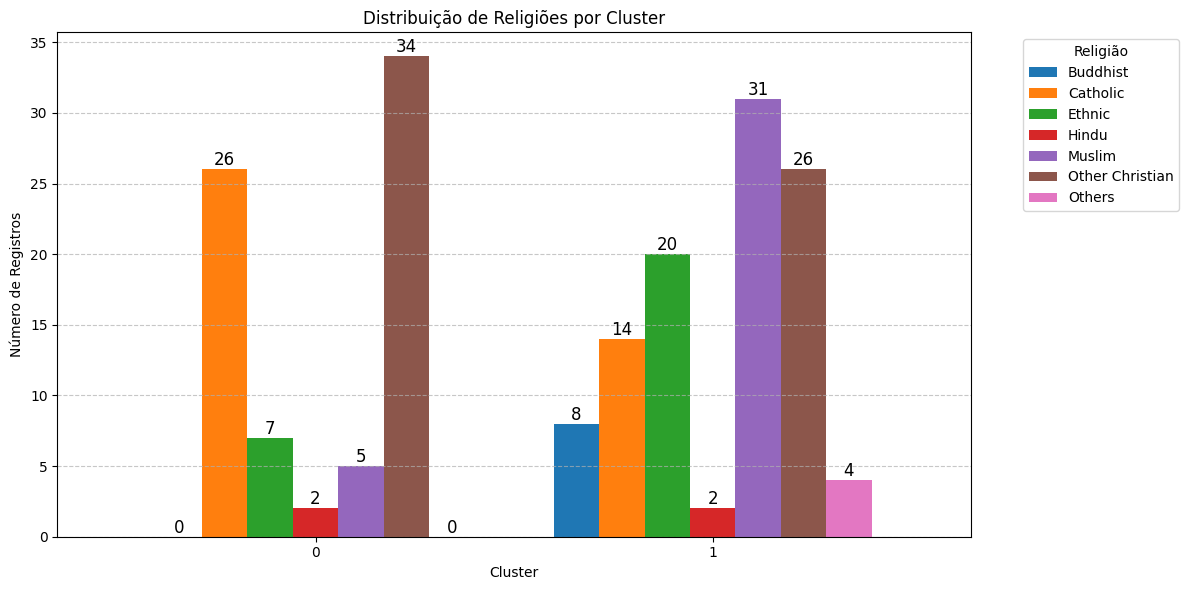

In [140]:
#region Cluster x Religiões
flagsReligions = flagsFeaturesWithClusters.copy()
flagsReligions["religion"] = flags["religion"]
flagsReligions["religion"] = flagsReligions["religion"].astype(int)
flagsReligions["religion"] = flagsReligions["religion"].map(religionMapping)

plotBarChart(
    data=flagsReligions,
    columns=["cluster", "religion"],
    title="Distribuição de Religiões por Cluster",
    xlabel="Cluster",
    ylabel="Número de Registros",
    legend="Religião"
)
#endregion

In [141]:
# Agrupar por cluster e religião e contar a distribuição
religionByCluster = flagsReligions.groupby(["cluster", "religion"]).size().unstack(fill_value=0)

# Exibir a matriz de distribuição de religiões por cluster
print("Matriz de Distribuição de Religiões por Cluster:")
print(religionByCluster)


Matriz de Distribuição de Religiões por Cluster:
religion  Buddhist  Catholic  Ethnic  Hindu  Muslim  Other Christian  Others
cluster                                                                     
0                0        26       7      2       5               34       0
1                8        14      20      2      31               26       4


In [ ]:
flagsCountry["religion"] = flags["religion"].map(religionMapping)

cluster_0 = flagsCountry[flagsCountry["cluster"] == 0][["name", "religion"]]
cluster_1 = flagsCountry[flagsCountry["cluster"] == 1][["name", "religion"]]

In [ ]:
cluster_0

,name,religion
2,American-Samoa,Other Christian
5,Anguilla,Other Christian
6,Antigua-Barbuda,Other Christian
7,Argentina,Catholic
8,Argentine,Catholic
...,...,...
169,Uruguay,Catholic
170,US-Virgin-Isles,Other Christian
171,USA,Other Christian
174,Venezuela,Catholic


In [ ]:
cluster_0["religion"].value_counts()

religion
Other Christian    34
Catholic           26
Ethnic              7
Muslim              5
Hindu               2
Name: count, dtype: int64

In [ ]:
cluster_1

,name,religion
0,Afghanistan,Muslim
1,Algeria,Muslim
3,Andorra,Catholic
4,Angola,Ethnic
9,Australia,Other Christian
...,...,...
172,Vanuatu,Other Christian
173,Vatican-City,Catholic
176,Zaire,Ethnic
177,Zambia,Ethnic


In [ ]:
cluster_1["religion"].value_counts()

religion
Muslim             31
Other Christian    26
Ethnic             20
Catholic           14
Buddhist            8
Others              4
Hindu               2
Name: count, dtype: int64

#### Religiões x Continentes

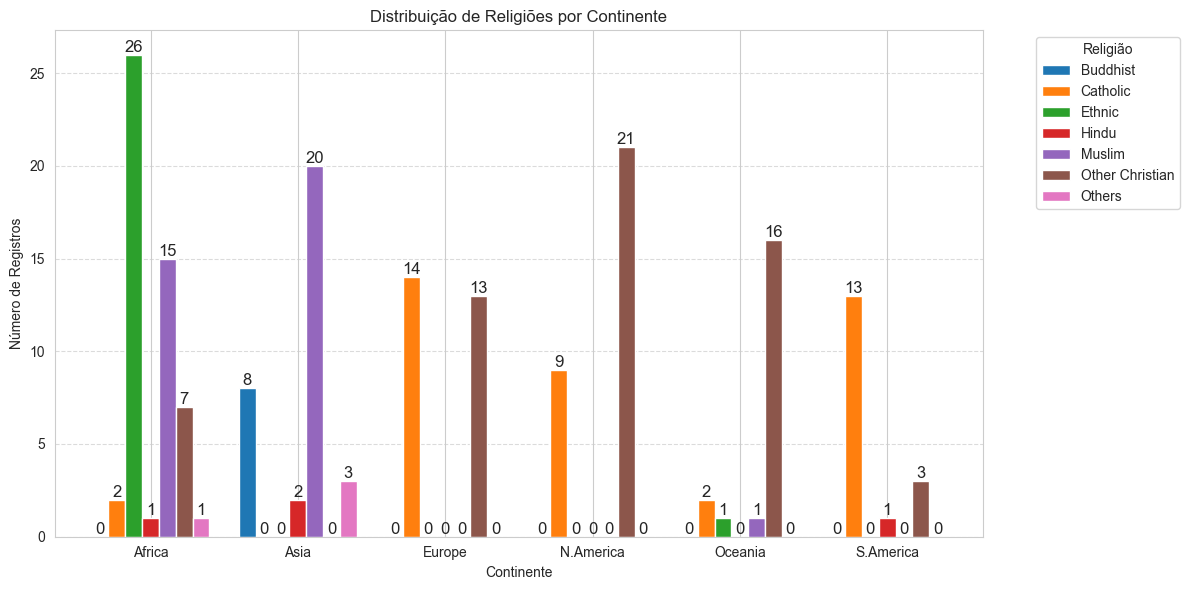

In [ ]:
#region Religiões x Continentes
flagsReligionLandmass = flagsFeaturesWithClusters.copy()
flagsReligionLandmass["religion"] = flags["religion"].map(religionMapping)
flagsReligionLandmass["landmass"] = flags["landmass"].map(landmassMapping)

plotBarChart(
    data=flagsReligionLandmass,
    columns=["landmass", "religion"],
    title="Distribuição de Religiões por Continente",
    xlabel="Continente",
    ylabel="Número de Registros",
    legend="Religião"
)
#endregion

#### Relatório: Religiões x Continentes

In [ ]:
#region Relatório de Religiões por Continente
flagsLandmass = flagsFeaturesWithClusters.copy()
flagsLandmass["landmass"] = flags["landmass"].map(landmassMapping)
flagsLandmass["religion"] = flags["religion"].map(religionMapping)

analyzeReligionByContinent(flagsLandmass)
#endregion

>>> Frequência de Religiões por Continente:
religion   Buddhist  Catholic  Ethnic  Hindu  Muslim  Other Christian  Others
landmass                                                                     
Africa            0         2      26      1      15                7       1
Asia              8         0       0      2      20                0       3
Europe            0        14       0      0       0               13       0
N.America         0         9       0      0       0               21       0
Oceania           0         2       1      0       1               16       0
S.America         0        13       0      1       0                3       0

>>> Religião Predominante por Continente:
landmass
Africa                Ethnic
Asia                  Muslim
Europe              Catholic
N.America    Other Christian
Oceania      Other Christian
S.America           Catholic
dtype: object

>>> Número de Religiões Presentes por Continente:
landmass
Africa       6
Asia         4
Eu